# Dynamics of the Periodically Driven Long-Range TF Ising Model


**Insructions:** Just scroll past the python code to see the output figures.


## Abstract
DMF is a phenomenon whereby periodically driven Many Body Systems are prevented from thermalizing to infinite temperature due to a dynamical hysteresis in the macroscopic response. DMF can, under certain resonance conditions in the drive parameters, cause the response to ‘freeze’ completely to its initial value for all times. This has been demonstrated (via the Jordan-Wigner Transformation) in the driven TFIM with nearest neighbour interactions, and is shown to be protected when translational invariance is explicitly broken (say, by disorder). We have suspected that this is also protected against the loss of other symmetries, for example, in long range systems where JW transformation produces nonlocalities. To prove this, we introduce a long-range power law dependence in the TFIM, where the exchange $J_{ij}\sim 1/|i-j|^\beta$. Here, for $\beta=\infty$, we recover the short range TFIM and freezing at resonant drive parameters. When $\beta=0$, taking $N\rightarrow\infty$ allows us to describe the exact dynamics by the periodically driven Lipkin-Meshkov-Glick (LMG) model, which we have solved numerically to obtain a similar kind of DMF and ‘freezing’ as the$\beta=\infty$ case (though at different resonant points). 
We now need an adequate analytical framework and numerical simulation method for looking at $\infty > \beta >  0$. We have seen that exact dynamics, being an NP-hard problem, is not possible to simulate beyond $N = O(10)$, and compares poorly at $\beta = 0$ with the LMG results due to heavy revivals in the finite size dynamics. Thus, approximate methods are required for simulating large N and nonzero $\beta$. We have the coding machinery in place to simulate using the Discrete Truncated Wigner Approximation as well as  a coarse-grained BBGKY heirarchy dynamics as described in. However, we lack sufficiently powerful computational resources to pull it off. Since Stanford has PetaFLOP clusters, we were hoping for access. Finally, among possible analytical pathways, we were thinking about Random Phase Approximation of the type described in [11], or truncated JW transformation as described in ref [10].

For further details, I invite your attention to the writeup below, and welcome commentary and suggestions to proceed.


## Background
A generic interacting quantum many body system, if driven time-periodically for a sufficiently long time, is expected to follow a dynamical route to thermalization at infinite temperature. However, under certain conditions, this dynamical process can be suppressed, leading to **Dynamical Many Body Localization** or **Many Body Freezing**. As a paradigmatic example, consider the time-periodically driven **Transverse Field Ising Model** (TFIM) with **Nearest Neighbour Interactions** in 1-dimension, given by the Hamiltonian
$$
H( h_0, \omega, t) = -  \mathcal{J}\sum^{N-1}_i{\sigma^x_i\sigma^x_{i+1}} - \left[h_0 + h_D \cos{\left(\omega_D t\right)}\right]\sum^N_i \sigma^z_i,
$$
Due to translational invariance and other symmetries, this model belongs to a general class of integrable models that can be mapped to an ensemble of quantum two-level systems (TLS) [4, 9].  Thus,
$$
H( h_0, \omega, t) =\sum_{k} \psi_{k}^{\dagger} 
\left(
\begin{array}{cc}
\left[h_0 + h_D \cos{\left(\omega_D t\right)}\right]+ J\cos{k} & J\sin{k}\\
J\sin{k} & -\left[h_0 + h_D \cos{\left(\omega_D t\right)}\right]- J\cos{k}
\end{array}
\right)
\psi_{k}
$$
Therefore, a response like $\langle \sigma^z \rangle$ will never settle to an average value given by an infinite temperature Gibbs ensemble. The long-time average of this response will have a highly non-monotonic dependence on the drive parameters. At specific resonances, the average can be completely frozen at the value given by the initial state itself! We have already seen that this type of response is protected against the loss of translational symmetry (for instance, against disorder [6]). Now, we're wondering if this phenomenon has higher levels of symmetry protection, for instance, under long-range interactions.

## Introduction
Consider the 1-dimensional TFIM with **long range spin exchange** and periodicaly driven transverse field, where
$$
H(\beta, h_0, \omega, t) = -  \mathcal{J}\sum^N_{i<j}j_\beta\frac{\sigma^z_i\sigma^z_j}{|i-j|^\beta} - \left[h_0 + h_D \cos{\left(\omega_D t\right)}\right]\sum^N_i \sigma^x_i.
$$
Here, $j_\beta$ is chosen  as per the Kac prescription so as to keep the energy per spin finite in the thermodynamic limit. Thus,
$$
j_\beta = \frac{N^{1-\beta}}{\sum^N_{i\neq j}|i-j|^{-\beta}}.
$$
Consider the case $\beta = 0$, where $j_0 = 2/(N-1)$. In the thermodynamic limit ($N\rightarrow\infty$), this system approaches the mean-field dynamics given by the driven Lipkin-Meshkov-Glick (LMG) model [1]. Here, the many body state is completely uncorrelated and can be written as a product state *viz* $|\Psi(t)\rangle \overset{N\rightarrow\infty}{=} \displaystyle\prod^N_{i=1} |\psi_{MF}(t)\rangle$ [2], where all the $|\psi_{MF}(t)\rangle$'s are identical and obey the self-consistently updated Non - Linear Schrödinger Equation (NLSE) given by
$$
i \frac{\mathrm d}{\mathrm{d}t}|\psi_{MF}(t)\rangle = \widetilde{H}\big\{|\psi_{MF}(t)\rangle, t\big\}|\psi_{MF}(t)\rangle,
$$
where
$$
\widetilde{H}\big\{|\psi_{MF}(t)\rangle, t\big\} =  -  \mathcal{J}\langle \psi_{MF}(t)|\sigma^z|\psi_{MF}(t)\rangle\;\sigma^z -  \left[h_0 + h_D \cos{\left(\omega_D t\right)}\right]\;\sigma^x.
$$

## Numerical Investigation for  $\beta = 0$. 

First, let us look at the Mean-Field dynamics (exact in the thermodynamic limit) of the LMG model described above. The simulation is relatively simple, and we start from the numerically obtained ground state of the zero-field Hamiltonian (note that this is just the eigenstate of $\sigma^z$; it does not appear to be interesting to start from an eigenstate of $\sigma^x$, as then the MF dynamics becomes trivial). 

In [1]:
import numpy as np
from numpy.linalg import multi_dot, norm, eig
from scipy.signal import find_peaks
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
#Size of fonts
fs = 20
rc({'axes.titlesize': fs})
rc({'axes.labelsize':fs})
rc({'figure.titlesize':fs})
rc({'legend.fontsize': 0.75 * fs})

pheightmin = 10

sx = np.array([[0, 1],[ 1, 0]])
sy = np.array([[0, -1j],[1j, 0]])
sz = np.array([[1, 0],[0, -1]])

def mf_jac (psi, t, h0, h, omega):
    sz_mf = multi_dot([psi.conjugate(), sz, psi])
    drive = h0 + h * np.cos(omega * t)
    jac = (1j) * (sz_mf * sz + drive * sx)
    return jac

def mf_func (psi, t, h0, h, omega):
    return np.dot(mf_jac(psi, t, h0, h, omega), psi)

def mz_mf_flucs(t, psi0, h0, h, omega):
    sol_mf = odeintw(mf_func, psi0, t, args=(h0, h, omega), Dfun=mf_jac)
    #calculate expectation values
    mx_mf = np.einsum("ij,jk,ik->i", sol_mf.conjugate(), sx, sol_mf)
    return np.std(mx_mf.real)

#Start from the t=0 ground state
#evals, evecs = eig((1j) * tls_jac(None, 0.0, h0, h, 1.0))
#psi0 = evecs[:,np.argmin(evals)].copy()

#Start from eigenstate of sz
evals, evecs = eig((1j) * tls_jac(None, 0.0, 0.0, 0.0, 0.0))
psi0 = evecs[:,np.argmin(evals)].copy()

### Detailed investigation of 'freezing' in the Parameter Space

We now look at plots of the long-time standard deviation in $S^x = \langle \sigma^x\rangle$. The data is strobed in time at integer multiples of $2T$, where $T=2\pi/\omega$. Note that $S^m_\omega$ has a highly non-monotonic dependence for the MF dynamics (left panel below) and approaches a small minimum (nearly $0$) for a discrete set of values of, signifying a freeze of the system in its initial state. Thus, we can infer that this resonance occurs at multiiple values of $\omega$ for every $h_D$.

MF dynamics for h = 75.000000, w with 10 processes ...
Done in 237.870785 secs
Now plotting  4  results with as many processes


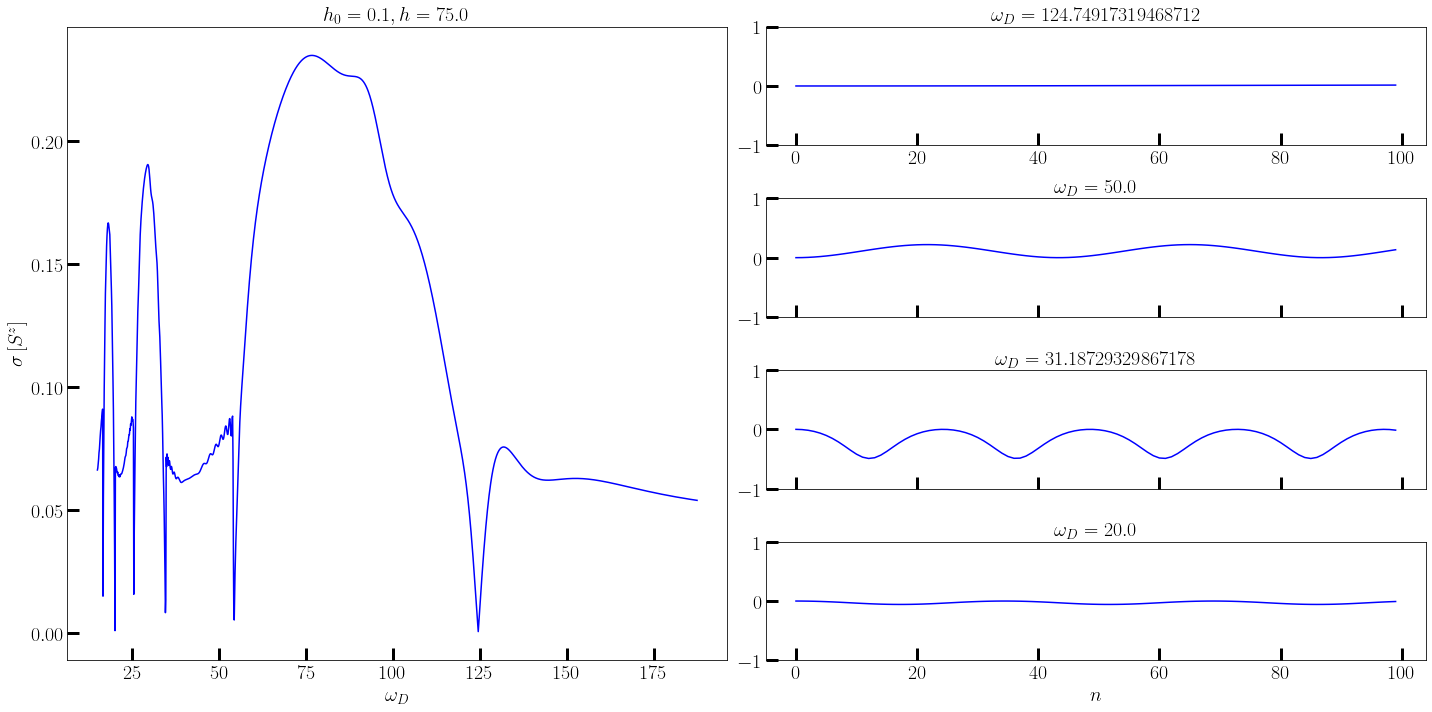

In [2]:
from multiprocessing import Process, Queue, Pool
from odeintw import odeintw
from scipy.special import j0
from scipy.special import jn_zeros
import time

def dynamics_evolve(*args, **kwargs):
    arguments, q = args
    func, init, times = arguments
    sol_mf = odeintw(func, init, times, args=kwargs['args'], Dfun = kwargs['Dfun'])
    mx = np.einsum("ij,jk,ik->i", sol_mf.conjugate(), sx, sol_mf)
    q.put(( mx, kwargs['args']))
        
if __name__ == '__main__':
    nprocs = 10
    evals, evecs = eig((1j) * tls_jac(None, 0.0, 0.0, 0.0, 0.0))
    psi0 = evecs[:,np.argmin(evals)].copy()
    h = 75
    h0 = 0.06
    nmax = 100

    omegas = np.linspace(15.0, 2.5 * h,  150 * nprocs)
    zero = jn_zeros(0,1)[0]
    strobed_omegas = [h/zero, 20.0, 4.0 * h/zero, 50.0]
    
    fig3 = plt.figure(tight_layout=True, figsize=(20,10))
    gs = fig3.add_gridspec(len(strobed_omegas), 2)
    
    f3_ax1 = fig3.add_subplot(gs[:, 0])
    f3_ax1.set_title(r"$h_0 = %1.1lf, h = %2.1lf$" % (h0, h), fontsize=fs)
    f3_ax1.set_ylabel(r'$\sigma\left[S^z\right]$',fontsize=fs, rotation="vertical")
    f3_ax1.set_xlabel(r'$\omega_D$',fontsize=fs)
    f3_ax1.tick_params(direction='in', length=12, width=3, labelsize=fs, labelbottom=True)
    
    axes = []
    for i, _ in enumerate(strobed_omegas):
        ax = fig3.add_subplot(gs[i, -1])
        lb = True if i == 0 or i == len(strobed_omegas)-1 else False
        ax.tick_params(direction='in', length=12, width=3, labelsize=fs, labelbottom=lb)
        axes.append(ax)
    axes[-1].set_xlabel(r'$n$', fontsize=fs)
        
    print("MF dynamics for h = %f, w with %d processes ..." % (h, nprocs))
    pool = Pool(processes = nprocs)
    start = time.time()
    dq_mf = pool.starmap(mz_mf_flucs,[(4.0*np.pi*np.arange(nmax)/w, psi0, h0, h, w) for w in omegas])
    f3_ax1.plot(omegas, dq_mf,'b', label = "MF (strobed)")
    elapsed = (time.time() - start)  
    print("Done in %lf secs" % elapsed)
   
    print("Now plotting ", len(strobed_omegas)," results with as many processes")
    start = time.time()
    q = Queue()
    procs = []
    for w in strobed_omegas:
        strobed_times = 4.0 * np.pi * np.arange(nmax)/w
        arguments = mf_func, psi0, strobed_times
        keywords = {'args':(h0,h,w), 'Dfun':mf_jac}
        p = Process(target=dynamics_evolve, args=(arguments,q), kwargs=keywords)
        p.start()
        procs.append(p)
        
    for i, p in enumerate(procs):
        p.join()
        strobed_mz, (h0,h,w) = q.get()
        axes[i].set_title(r'$\omega_D= {}$'.format(w), fontsize=fs)
        axes[i].set_ylim((-1.0,1.0))
        axes[i].plot(np.arange(nmax),strobed_mz.real,'b')

## Conclusions

These points of near-infinite freezing (for sufficiently large $\omega_D$ so as to discount adiabatic effects) are shown above in the minima of the plots. Thus, we can conclude the following

* The 'freezing of response' as described for TLS dynamics in [3,4] does not appear to occur in the thermodynamic limit for long range systems, but a different mechanism of freezing appears at different resonant frequencies for the mean field case ($\beta = 0$). It remains to be seen if these responses persist for $\beta \gg 0$. These are contrasted with the TLS case, where, at freezing,  $J_0(h_D/\omega_D) = 0$[3,4]. 

* The FFTs indicate that, at resonance, a periodic signal of frequency $\omega_D/2$ dominates in the response. When strobed at the corresponding time period, the resultant signal vanishes, indicating freezing at discrete time intervals.

# Finite Size Contributions

In order to investigate this phenomenon for nonzero $\beta$, where mean field is not exact in the thermodynamic limit, We require full many body simulations of the dynamics. To that end, we need to determine the role of finite size effects that arise in the many body simulation. We contrast the MF solution for $\beta=0$ with exact dynamics for small lattice size ($N=8$ with PBC is as far as our computational resources will allow before memory overload). Plots of $\langle \sigma^z\rangle$ vs time for both cases clearly shows that finite size effects alter the dynamics significantly past time scales of $\mathcal{O}(10^)$, in qualitative agreement with results from ref[2]. Thus, exact diagonalization methods prove to be insufficient .

Mean Field Solution Completed.
Running Finite Size Exact Dynamics for h0 = 0.100000 and omega = 0.000000:

Dumping outputs to dictionary ...
Exact Solution for N = 8 Completed.
Mean Field Solution Completed.
Running Finite Size Exact Dynamics for h0 = 0.100000 and omega = 3.000000:

Dumping outputs to dictionary ...
Exact Solution for N = 8 Completed.
Mean Field Solution Completed.
Running Finite Size Exact Dynamics for h0 = 0.100000 and omega = 10.396000:

Dumping outputs to dictionary ...
Exact Solution for N = 8 Completed.
Mean Field Solution Completed.
Running Finite Size Exact Dynamics for h0 = 0.100000 and omega = 25.000000:

Dumping outputs to dictionary ...
Exact Solution for N = 8 Completed.


[]

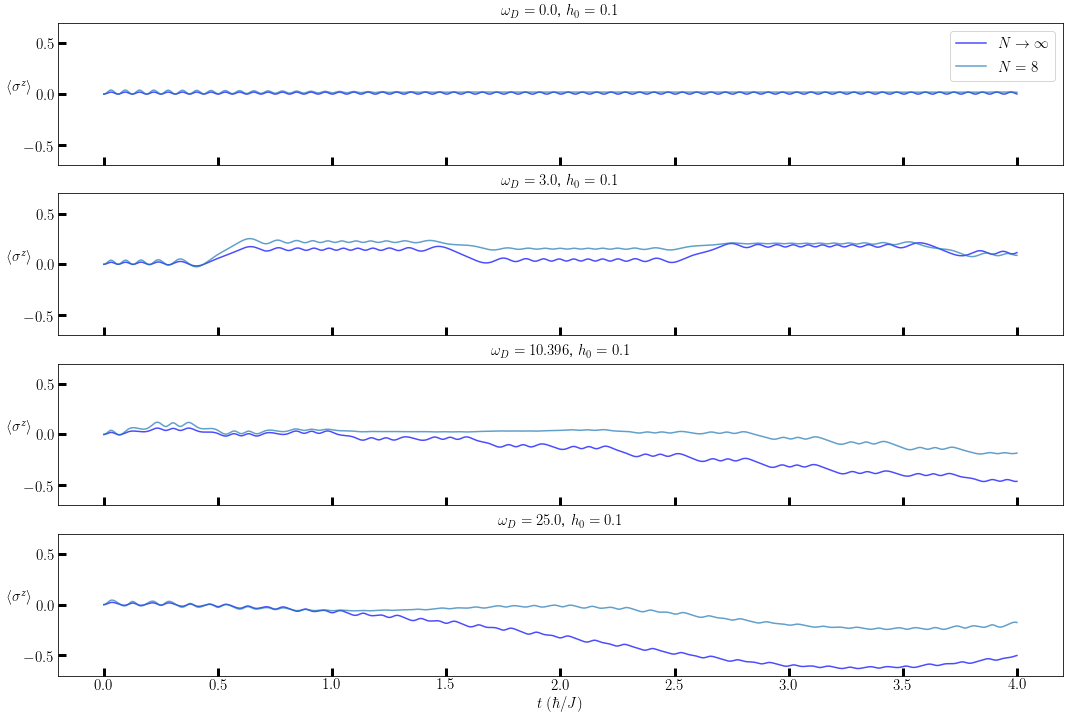

In [22]:
import numpy as np
from numpy.linalg import multi_dot, norm, eig
from odeintw import odeintw
from scipy.signal import find_peaks

import curie_weiss_periodic as cp

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

fs = 15
hdc = -0.1
amp = 25.0

sx = np.array([[0, 1],[ 1, 0]])
sy = np.array([[0, -1j],[1j, 0]])
sz = np.array([[1, 0],[0, -1]])

t = np.linspace(0, 4.0, 6000)
t_exact = np.linspace(0, 4.0, 6000)

finite_sizes = 8

omegas = [0.0, 3.0, 10.396, 25.0]

fig, axs = plt.subplots(len(omegas), 1, sharex='col', figsize=(18,12))

#Exact Diagonalization of finite sizes
def exact_dynamics(p):
    h = cp.Hamiltonian(p)
    initstate =  np.ones(2**p.lattice_size, dtype="float64")/np.sqrt(2**p.lattice_size)
    return cp.run_dyn(p, initstate)

#Start from eigenstate of sx
evals, evecs = eig((1j) * tls_jac(None, 0.0, 0.0, 0.0,0.0))
psi0 = evecs[:,np.argmin(evals)].copy()

for i, w in enumerate(omegas):
    # Set up the inputs and call odeintw to solve the mean field system.
    sol_mf = odeintw(mf_func, psi0, t, args=(h0, h, w), Dfun=mf_jac)
    #calculate expectation values
    mz_mf = np.einsum("ij,jk,ik->i", sol_mf.conjugate(), sz, sol_mf)
    print("Mean Field Solution Completed.")

    axs[i].set_title(r"$\omega_D = {}$, ".format(w) + r"$h_0 = {}$ ".format(h0), fontsize=fs)
    axs[i].set_ylabel(r'$\langle\sigma^z\rangle$',fontsize=fs, rotation=0)
    axs[i].tick_params(direction='in', length=8, width=3, labelsize=fs)
    axs[i].plot(t, mz_mf.real, 'b', label = r"$N\to\infty$", alpha=0.7)
    print("Running Finite Size Exact Dynamics for h0 = %f and omega = %f:"%(h0, w))
    n = finite_sizes
    J = np.ones(n**2).reshape(n,n) * 2.0 / (n-1)
    #Set up the inputs and call curie_weiss_periodic to solve the exact system.
    p = cp.ParamData(hopmat = J, lattice_size=n, ampl=-amp, omega=w, times=t_exact, hx=0.0, hy=0.0, hz=-0.1, jx=-1.0, jy=0.0, jz=0.0)
    ed_data = exact_dynamics(p)
    print("Exact Solution for N = %d Completed." % n)   
    axs[i].plot(t_exact, np.real(ed_data["sz"]), label = r"$N = %d$" % n, alpha=0.7)

axs[-1].set_xlabel(r'$t\;(\hbar/J)$',fontsize=fs)        
legend0 = axs[0].legend(prop={'size': fs})
for ax in axs:
    ax.set_ylim([-0.7, 0.7])
plt.plot()

# Alternative 1 : Truncated Wigner Approximation 
Exact dynamics is an NP hard problem, with the problem size scaling as $2^N$. Thus, it is computationally impractical to simulate this in classical computers beyond $N = \mathcal{O}(10^1)$, necessitating the use of approximate methods such as the DTWA. The DTWA extends the traditional Truncated Wigner Approximation to systems with discrete degrees of freedom, such as our case. Here, each spin-$1/2$ spans a discrete phase space consisting of all possible eigenvalues of a complete tuple of canonically conjugate observables, say $\left(\sigma^x,\sigma^y, \sigma^z\right)$. We can thus construct the Wigner distribution of any spin density matrix $\rho$ by the trace $W(\vec{r}) = \rm{Tr}\{\rho A(\vec{r})\}$ spannning all possible Bloch vectors $\vec{r}$, where the phase point operator $A(\vec{r}) = \displaystyle\frac{1}{2}\left(1 + \vec{r}.\vec{\sigma}\right)$. The expectation value of any observable $\mathcal{O}$ is simply $\langle\mathcal{O}\rangle = \sum_{\vec{r}} W(\vec{r}) O_W(\vec{r})$, where the Weyl symbol $O_W(\vec{r})=\rm{Tr}\{\mathcal{O} A(\vec{r})\}$. All this can be readily generalized to $N$ spins with the outer product phase point operator $A(\vec{r}_1, \vec{r}_2, \cdots \vec{r}_N) = \prod_i A(\vec{r}_i)$. [7] If the computational simulation of the exact quantum time evolution of this phase point operator is intractable, then DTWA approximates it by the  classical evolution of $\prod_i A(\vec{r}_i(t))$. Thus, in DTWA, points are sampled, with quasiprobability weights given by $W(\vec{r}_1, \vec{r}_2, \cdots \vec{r}_N) = \rm{Tr}\{\rho A(\vec{r}_1, \vec{r}_2, \cdots \vec{r}_N)\}$, each point evolved classically, and expectation values approximated by the $W-$ weighed sum of the corresponding Weyl symbol. In DTWA, the computational problem scales as $n_i\times 3N$[8], where $n_i$ is the number of samples [7]. Improvements in accuracy of DTWA added using the BBGKY heirarchy method to quadratic order on the phase point dynamics[8], leads to a computational scaling of $n_i \times 9 N^2$ [7]. We have software machinery set up for doing both DTWA and DTWA-BBGKY for general long-range Curie-Weiss models, but presently lack the computational resources to run for system sizes larger than $N = 25-30$. **With access to resources such as [SAIL] (https://cs.stanford.edu/csdcf/sail-compute-cluster) or equivalent, we can readily scale this up to $N = 10^4$ (for DTWA) or $10^3$ (for DTWA-BBGKY).**
 
# Alternative 2: Coarse-Grained BBGKY Dynamics

For large system sizes, coarse-grained BBGKY dynamics of the type described for time-independent TFIM in ref [2], may be a more realistic candidate for long-range simulations provided translational invariance is maintained. Here, the equations of motion are approximated by a heirarchy of coupled dynamical systems of single spin expectation values $s^\mu = \langle \sigma^\mu\rangle$ and spin correlation functions $G^{\mu\nu}_k(t) = \langle \delta\sigma^\mu_1\delta\sigma^\nu_k \rangle$ up to the leading order corrections in $1/N$. In order to access larger system sizes, the quantity $G^{\mu\nu}_k(t)$ can be coarse-grain averaged over $l-$sites. With this prescription, large system sizes (of order $N=10^9$ can be readily simulated with access to cluster resources such as [SAIL] (https://cs.stanford.edu/csdcf/sail-compute-cluster).

Also note that ref [2] has already performed simulations of the BBGKY dynamics (with no drive) and determined that, for small $\beta$, the timescale after which the dynamics of correlations become significant grows logarithmically as a function of $N$, attributing this to chaos in the underlying classical dynamics of the finite long-range interactions. This suggests that, for long times, an analytical solution may be possible in the mean field with Gaussian fluctuations or some kind of Random Phase Approximation. However, note that the possibility of greater chaos in the preiodically driven Mean field dynamics might not make this feasible for our case.

# Suggestions
Thus, we suggest that we carry out numerical simulations (once adequate resources arew available) of the growth of correlations for large-$N$ periodically driven systems with $\beta\neq 0$ to determine the scaling law for the correlations. If the correlations grow due to chaotic dynamics (as suggested by ref [2]), then we can argue that suppressing the onset of chaos should allow us to suppress the growth of correlations, thus allowing for freezing of the type seen in the mean field dynamics **even for long-range systems**. We can also investigate the role of classical chaos using DTWA dynamics

For analytical approaches, we can try either an RPA of the type described in [11], or a truncated Jordan Wigner approach as described in [10].

# Classical Lipkin Dynamics

In the continuum limit, the Lipkin system can be described by the $p,q$ Hamiltonian:
\begin{equation*}
H = -2 q^2 - h(t)\;\sqrt{1-4q^2}\;\cos{p},
\end{equation*}
which yields the Hamiltonian dynamical system 
\begin{align*}
\frac{dq}{dt} &= h(t)\;\sqrt{1-4q^2}\;\sin{p}\\
\frac{dp}{dt} &= 4q\bigg[1-\frac{h(t)\cos{p}}{\sqrt{1-4q^2}}\bigg]
\end{align*}
Below are the Poincare sections (strobed at integer multiples of $T=2\pi/\omega$) of the ensuing dynamics for $h(t)=h\cos{\omega t}$ for two cases, one for which $J_0(4h/\omega)=0$ and one at lower value of $h$.

Poincare section dynamics for h = 1.45 w = 5.0 with 12 processes ...


/tmp/ipykernel_150839/899472125.py:36: RuntimeWarning: invalid value encountered in sqrt
  sterm = np.sqrt(1.0 - 4.0 * q * q)
/tmp/ipykernel_150839/899472125.py:36: RuntimeWarning: invalid value encountered in sqrt
  sterm = np.sqrt(1.0 - 4.0 * q * q)
/tmp/ipykernel_150839/899472125.py:69: RuntimeWarning: invalid value encountered in remainder
  pvals = poincare_data[:,1] % (2.0 * np.pi)


Poincare section dynamics for h = 1.5 w = 5.0 with 12 processes ...


/tmp/ipykernel_150839/899472125.py:36: RuntimeWarning: invalid value encountered in sqrt
  sterm = np.sqrt(1.0 - 4.0 * q * q)


Done in 96.799557 secs


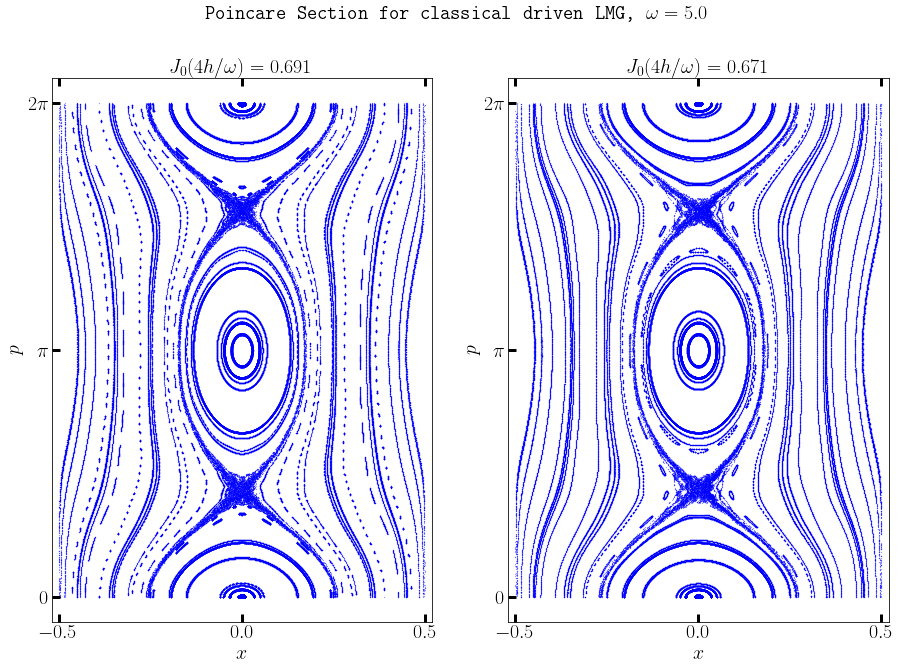

In [4]:
# Lipkin Model Cross-Section
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from multiprocessing import Pool
import time
from scipy.special import j0, jn_zeros
import warnings

fs = 20

# Drive parameters
h0 = 0.0
#omega = 90
omega = 5.0

#eta = jn_zeros(0,1)
#eta = eta[0]
#h_frz = eta * omega/4
#h_reg = 26.0

h_frz = 1.45
h_reg = 1.5

ampls = [h_frz, h_reg]

# Maximum number of strobes
nmax = 1000

# Number of Processors
nprocs = 12

def lmg(z, t, h0, h, w):
    q, p = z
    drive = h0 + h * np.cos(w * t)
    sterm = np.sqrt(1.0 - 4.0 * q * q)
    qdot = drive * sterm * np.sin(p)
    pdot = 4.0 * q * (1.0 - (drive * np.cos(p)/sterm) )
    return [qdot, pdot]

def poincare_sec(x0, p0, nmax, args):
    h0, h, omega = args
    T = 2.0 * np.pi/omega
    t = T * np.arange(nmax)
    return odeint(lmg, [x0, p0], t, args=args)

# Initial Conditions
n_ic = 10
init_x = np.linspace(-0.45, 0.45, n_ic)
near_zero = np.linspace(-0.01, 0.01, 10)
init_x = np.sort(np.append(init_x, near_zero))
init_p = np.linspace(0.0, 2.0 * np.pi, n_ic)
init_p = np.sort(np.append(init_p, [0.1, np.pi + 0.2]))
xv, pv = np.meshgrid(init_x, init_p, indexing='ij')


if __name__ == '__main__':
    p = Pool(processes = nprocs)
    start = time.time()
    n_ampls = len(ampls)
    fig, axs = plt.subplots(1, n_ampls, figsize=(15, 10))
    fig.suptitle(f'Poincare Section for classical driven LMG, $\omega = {omega}$', fontsize=fs)
    for i, h in enumerate(ampls):
        print(f"Poincare section dynamics for h = {h} w = {omega} with {nprocs} processes ...")
        poincare_data = p.starmap(poincare_sec,[(x0, p0, nmax, (h0, h, omega)) for x0, p0 in zip(xv.flatten(), pv.flatten())])
        
        poincare_data = np.vstack(poincare_data)
        qvals = poincare_data[:,0]
        pvals = poincare_data[:,1] % (2.0 * np.pi)
        axs[i].set_title(r'$J_0(4 h/\omega) = {:1.3f}$'.format(j0(4*h/omega)), fontsize=fs)
        axs[i].scatter(qvals, pvals , color='blue', marker='.', s=.1)  

        axs[i].set_xlabel(r"$x$", fontsize=fs)
        x_tick = np.array([-0.5, 0.0, 0.5])
        axs[i].set_xticks(x_tick)
        axs[i].set_xlim(-0.52, 0.52)

        unit   = 1.0
        p_tick = np.arange(0.0, 2.0 + unit, unit)
        p_label = [r"$0$", r"$\pi$", r"$2\pi$"]
        axs[i].set_yticks(p_tick*np.pi, p_label, fontsize=20)
        axs[i].set_ylabel(r"$p$", fontsize=fs)

        axs[i].tick_params(direction='in', length=8, width=3, labelsize=fs)
        
elapsed =  (time.time() - start)
print("Done in %lf secs" % elapsed)

## References
1. Lipkin, H. J., N. Meshkov, and A. J. Glick. “Validity of Many-Body Approximation Methods for a Solvable Model: (I). Exact Solutions and Perturbation Theory.” Nuclear Physics 62, no. 2 (February 1, 1965): 188–98. https://doi.org/10/fpqf4q.
2. Mori, T. “[1810.01584] Prethermalization in the Transverse-Field Ising Chain with Long-Range Interactions.” Accessed October 30, 2019. https://arxiv.org/abs/1810.01584.
3. Miao, Qiang, and Yujun Zheng. “Coherent Destruction of Tunneling in Two-Level System Driven across Avoided Crossing via Photon Statistics.” Scientific Reports 6, no. 1 (June 29, 2016): 1–12. https://doi.org/10.1038/srep28959.
4. Das, Arnab. “Exotic Freezing of Response in a Quantum Many-Body System.” Phys. Rev. B 82, no. 17 (November 2010): 172402. https://doi.org/10.1103/PhysRevB.82.172402.
5. Hegde, Swathi S., Hemant Katiyar, T. S. Mahesh, and Arnab Das. “Freezing a Quantum Magnet by Repeated Quantum Interference: An Experimental Realization.” Physical Review B 90, no. 17 (November 7, 2014): 174407. https://doi.org/10.1103/PhysRevB.90.174407.
6. Roy, Analabha, and Arnab Das. “Fate of Dynamical Many-Body Localization in the Presence of Disorder.” Physical Review B 91 (2015): 121106. https://doi.org/10/gcz8z2.

 7. Schachenmayer J., Pikovski A., Rey A.M. "Many-Body Quantum Spin Dynamics with Monte Carlo Trajectories on a Discrete Phase Space", Phys. Rev. X 5, 011022 (2015), https://doi.org/10.1103/PhysRevX.5.011022 .
 8. Lorenzo Pucci, Analabha Roy, and Michael Kastner, "Simulation of quantum spin dynamics by phase space sampling of Bogoliubov-Born-Green-Kirkwood-Yvon trajectories", Phys. Rev. B 93, 174302 (2016). https://doi.org/10.1103/PhysRevB.93.174302 .
 9. Asmi Haldar and Arnab Das, "Dynamical many‐body localization and delocalization in periodically driven closed quantum systems", Annalen der Physik 529(7), 1600333 (2017), https://doi.org/10.1002/andp.201600333
 10. S. Jaschke1 *et. al.*, "Critical phenomena and Kibble–Zurek scaling in the long-range quantum Ising chain", NJP 19 (2017), https://dx.doi.org/10.1088/1367-2630/aa65bc
 11. S. Susuki *et. al.*, "Quantum Ising Phases and Transitions in Transverse Ising Models", Springer (2013), https://dx.doi.org/10.1007/978-3-642-33039-1